In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np 
import pandas as pd
import os
import gc
import seaborn as sns
from matplotlib.patches import Rectangle
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.python.ops.math_ops import reduce_prod
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.layers import Embedding,Dense
import string
import re
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras import Input
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import plot_model

C:\Users\nadya\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Detecting fake job postings using Bidirectional LSTM


In response to the prevalence of fake job postings in the online job market, this study addresses the limited research on utilizing deep learning techniques for detecting fraudulent job advertisements. The research employs a Bidirectional Long Short-Term Memory (Bi-LSTM) model, incorporating both numeric and text features to effectively capture underlying patterns and relationships in the data. The proposed model demonstrates superior performance, achieving a 0.91 ROC AUC score and a 98.71% accuracy rate. These results highlight its potential for practical applications in combating fake job postings. The study contributes to the development of automated tools, enhancing the integrity of the job search process. Additionally, the research explores challenges, suggests future directions, and discusses ethical considerations, encouraging further exploration and development of solutions to address online job fraud.

## 1. Introduction

The internet's rapid expansion has revolutionized the job market, making online job portals indispensable for millions. However, this transformation has given rise to a pressing issue: the surge in fake job postings. These deceptive advertisements not only waste job seekers' time but also pose serious risks such as identity theft and financial loss. To address this problem, effective methods are required for detecting and mitigating the impact of fraudulent job postings.

Machine learning and natural language processing (NLP) techniques have proven effective in identifying deceptive content across various domains. Recurrent Neural Networks (RNNs) and their variants, particularly Long Short-Term Memory (LSTM) networks, have emerged as powerful tools for processing sequential data and capturing temporal patterns in text. Bidirectional LSTM (Bi-LSTM) networks, known for their ability to learn contextual information from past and future time steps, have shown remarkable performance in various NLP tasks.

This paper introduces a novel approach to detecting fake job postings using Bidirectional LSTM networks. The hypothesis is that Bi-LSTM's capacity to effectively capture the complex structure of textual data can distinguish between genuine and fraudulent job advertisements. The proposed methodology includes text preprocessing, word embedding, and model training, and is evaluated on various datasets. Through a series of experiments, the paper demonstrates the efficacy of the approach and compares its performance with other state-of-the-art techniques. Ultimately, the study highlights the potential of Bidirectional LSTM in effectively addressing the escalating problem of fake job postings.

## 2. Methodology

This section outlines the methodology employed for the detection of fake job postings using Bidirectional LSTM networks. The approach is structured into several key stages, each playing a crucial role in the development and evaluation of the proposed model. These stages include: literature reviews, data analysis and preprocessing, and word embedding.

### 2.1 Literature Review

The detection of fake job postings is situated within the broader context of deceptive content detection, encompassing spam, fake news, and manipulated online reviews. Various studies and techniques have been employed in these domains, providing valuable insights.

In the realm of spam detection, machine-learning algorithms have been pivotal. Sahami et al. (1998) proposed Naive Bayes classifiers, and Drucker et al. (1999) applied Support Vector Machines (SVM), both yielding promising results in identifying and filtering spam emails. Fake news detection involves innovative approaches, such as Zhou and Zafarani's (2018) hybrid model combining linguistic features with user behavior analysis, outperforming traditional machine learning methods.

Deceptive online reviews pose a challenge, with Ott et al. (2011) utilizing n-grams and SVM to identify fake reviews on hotel websites. In contrast, Li et al. (2020) leveraged linguistic cues and sentiment analysis for detecting deceptive reviews on ecommerce platforms.

Previous efforts in detecting fake job postings primarily relied on traditional machine learning algorithms. Chen et al. (2018) and Gupta et al. (2019) focused on extracting features from job postings, encompassing textual, categorical, and numeric data. Zhang et al. (2021) applied deep learning models, demonstrating improved performance compared to traditional methods but highlighting the need to fully leverage deep learning's potential in capturing sequential patterns.

To establish baseline models, a thorough literature review was conducted, analyzing additional classification studies (references [9]–[11]). This comprehensive examination sets the stage for the proposed novel approach using Bidirectional LSTM networks in the detection of fake job postings.

### 2.2 Description of Data

In this study, the "Real / Fake Job Posting Prediction" dataset from Kaggle serves as the foundation for analysis. This dataset encompasses 17,880 job postings, featuring a combination of structured and unstructured data in each entry. The dataset is labeled, comprising 16,244 instances of genuine job postings and 1,636 instances of fake job postings, making it well-suited for supervised learning tasks. Below is provided an overview of the key characteristics of the data, offering valuable insights into the distribution and composition of the dataset. 

* job_id - A unique identifier for each job posting
* location - The geographical location of the job.
* department - The department or organizational unit of the job belongs
* salary_range - The salary range for the job.
* company_profile- A brief description of the company.
* description - The detailed job description.
* requirements - A list of required skills or qualifications for the job.
* benefits - The benefits offered by the company.
* telecommuting - A binary variable indicates whether the job allows telecommuting.
* has_company_logo - A binary variable indicates a company logo's presence in the job posting.
* has_questions - A binary variable indicates whether the job posting includes screening questions.
* employment_type - The type of employment
* required_experience - The required education level for the job.
* industry - The industry to the job belongs.
* function - The job function or role.
* fraudulent - Target variable. A binary label indicating whether the job posting is genuine (0) or fake (1).


In [6]:
df=pd.read_csv("fake_job_postings.csv")
df.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [8]:
df.drop(columns=['job_id','department','salary_range'], inplace=True)
df_loc=pd.DataFrame(df.location.str.split(",", expand = True))
df['location']=df_loc[0]

In [9]:
df=df.fillna('UNK')
df['full_text'] = df.title+df.company_profile+df.description+df.requirements+df.benefits

### 2.3 Exploratory Data Analysis

In [10]:
%config InlineBackend.figure_format = 'retina'

Data exploration is integral to model building as it provides insight into the data and changes or modifications
needed before designing the model. The distribution of binary variables is given below.

Text(0.5, 1.0, 'telecommuting')

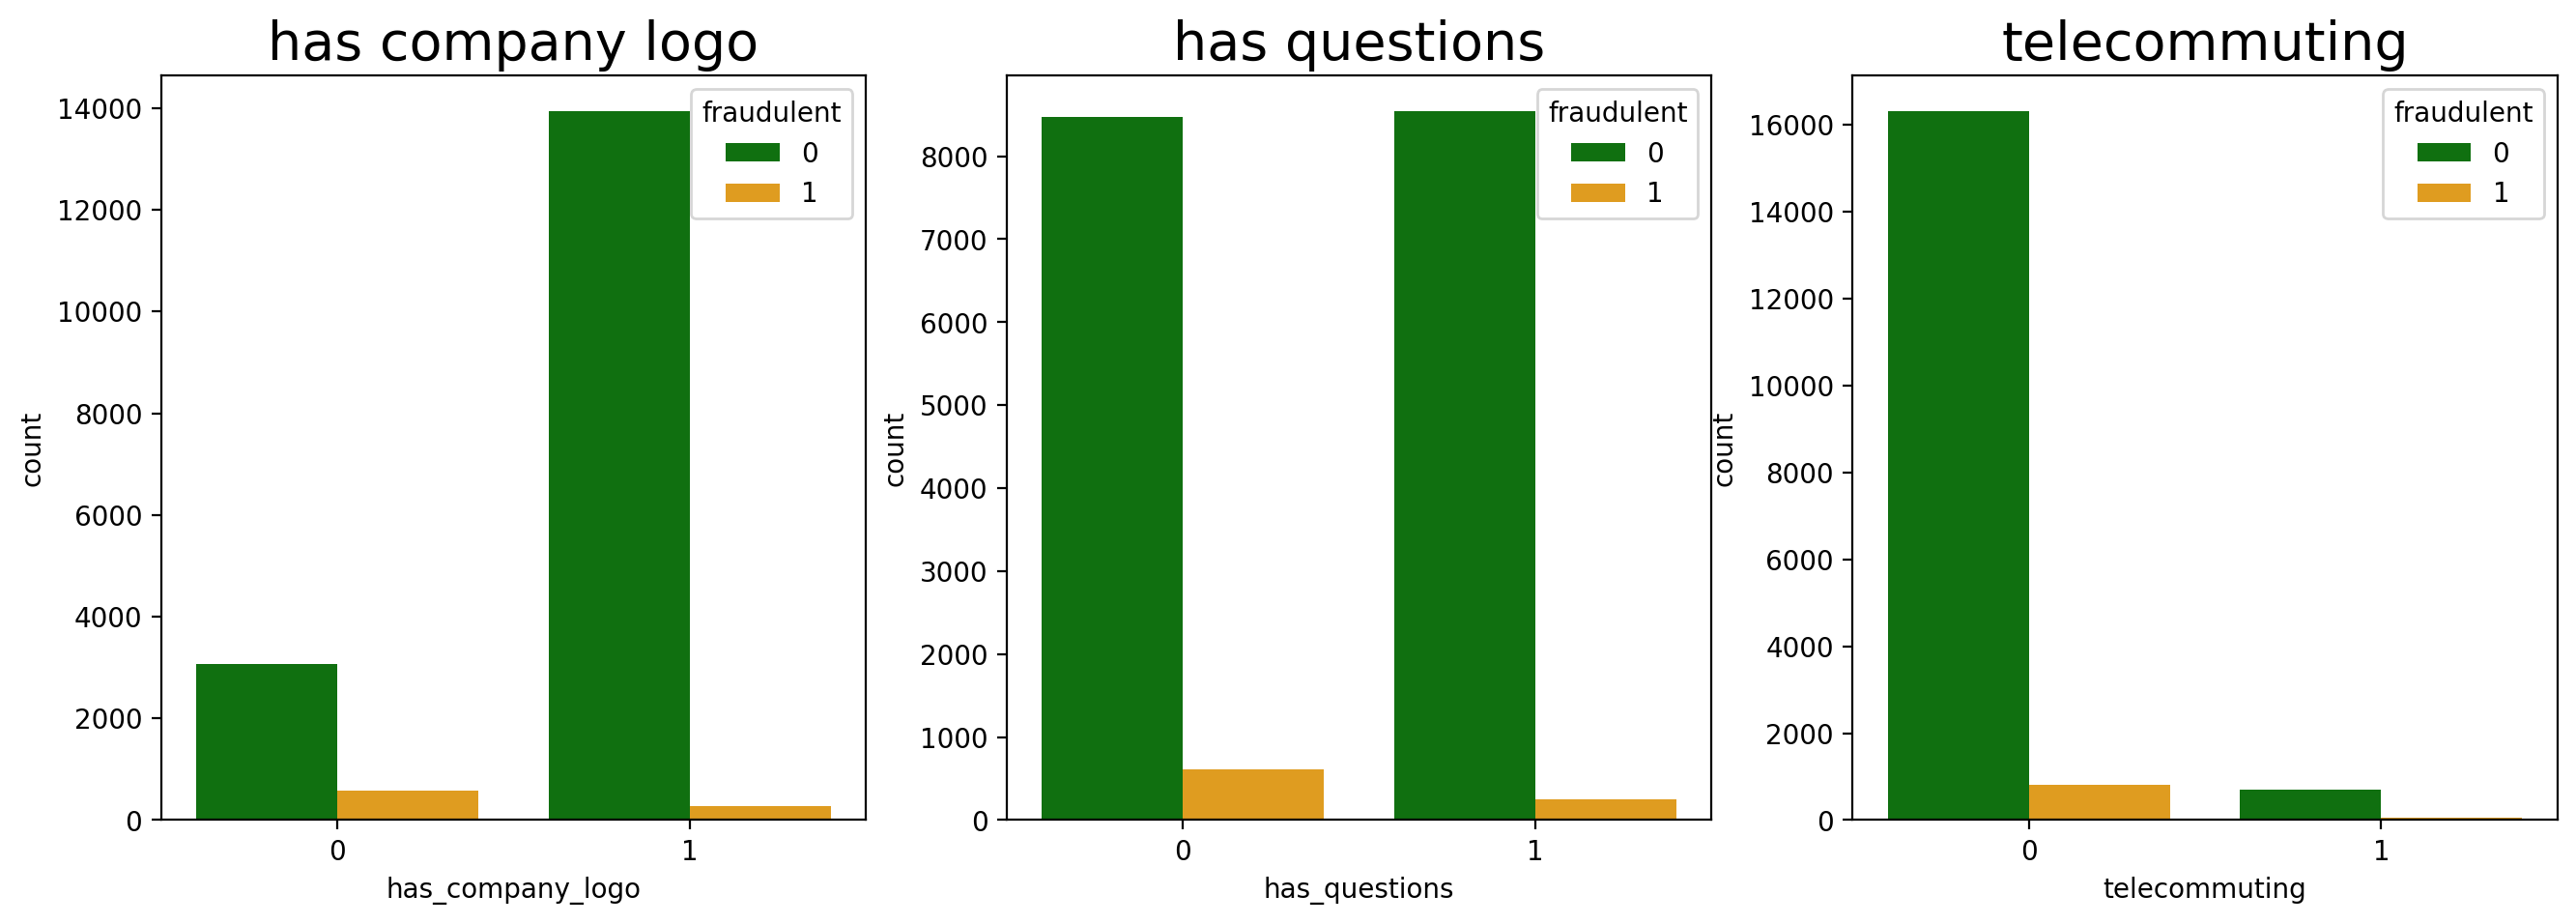

In [11]:
f, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(ax=axes[0],x='has_company_logo', data=df, palette=['green','orange'],hue="fraudulent")
axes[0].set_title("has company logo", fontsize=20)

sns.countplot(ax=axes[1],x='has_questions', data=df, palette=['green','orange'],hue="fraudulent")
axes[1].set_title("has questions", fontsize=20)

sns.countplot(ax=axes[2],x='telecommuting', data=df, palette=['green','orange'],hue="fraudulent")
plt.title("telecommuting", fontsize=20)

The study employed the CountVectorizer utility for extensive textual data analysis. CountVectorizer, a Natural Language Processing (NLP) technique, was applied to transform a set of text documents into a matrix of token counts. In the investigation of fake job postings, this method serves to identify prevalent words, phrases, or patterns potentially linked to deceptive listings. The word distributions for job titles, illustrated below, highlight that "Manager," "Developer," and "Engineer" are the most frequently utilized terms in job titles.
Experience, work, and team are the most frequently used words in full text

In [12]:
def bar_plot(df, column, title, width, height, n, get_count = True):
    if get_count == True:
        cnt_srs = df[column].value_counts(normalize = True)[:n]
    else:
        cnt_srs = df
        
    trace = go.Bar(
        x = cnt_srs.index,
        y = cnt_srs.values,
        marker = dict(
            color = '#1E90FF',
        ),
    )

    layout = go.Layout(
        title = go.layout.Title(
            text = '<b>'+title+'</b>',
            x = 0.1
        ),
        font = dict(size = 14),
        width = width,
        height = height,
    )

    data = [trace]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig, filename = 'bar_plot')

def count_word_frequency(series,w, top = 0, bot = 20):
    cv = CountVectorizer(stop_words='english')   
    cv_fit = cv.fit_transform(series)    
    word_list = cv.get_feature_names(); 
    count_list = cv_fit.toarray().sum(axis=0)
    frequency = pd.DataFrame({'Word': word_list, 'Frequency': count_list})
    frequency.sort_values(['Frequency'], ascending = False, inplace = True)
    #frequency['Percentage'] = frequency['Frequency']/frequency['Frequency'].sum()
    frequency['Percentage'] = frequency['Frequency'] ##/frequency['Frequency'].sum()
    frequency.drop('Frequency', inplace = True, axis = 1)
    frequency['Percentage'] = frequency['Percentage'].round(3)
    frequency = frequency.iloc[top:bot]
    frequency.set_index('Word', inplace = True)
    bar_plot(pd.Series(frequency['Percentage']), 'Percentage', 'Word Frequency Distribution - '+w, 800, 500, 20, False)
    return frequency

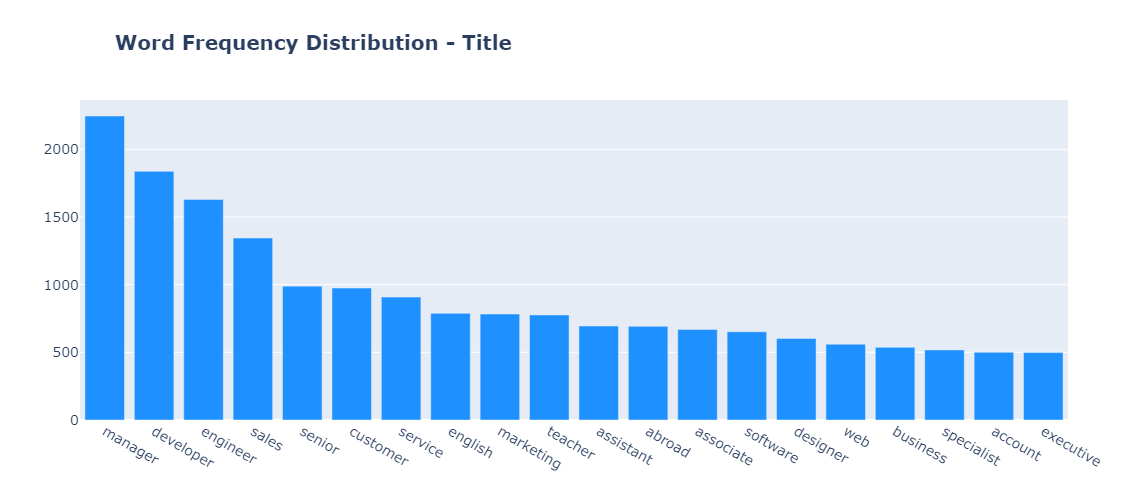

In [13]:
frequency = count_word_frequency(df['title'],'Title')

### 2.4 Data processing

The data cleaning process involved the removal of unnecessary characters, symbols, and HTML tags from the dataset, including punctuation marks, special characters, and white spaces. This step aims to ensure a clean and standardized dataset.

Text preprocessing was conducted using the TextVectorization layer, transforming textual data into a numerical format. This layer facilitates the conversion of text data into a fixed-length vector representation, enhancing compatibility with machine-learning models.

For handling categorical variables in the dataset, one-hot encoding was employed. This common technique in machine learning, including deep learning models like Bidirectional LSTMs, was used to convert categorical variables such as job location, industry, employment type, and education into a numerical format. This transformation allows the model to comprehend and effectively process these categorical features.

In [14]:
df.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'benefits', 'telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'fraudulent', 'full_text'],
      dtype='object')

In [15]:
cat_cols=['industry','function','required_education','employment_type','required_experience','location']
df = pd.get_dummies(df, columns=cat_cols) 
print('Shape after one-hot-encoding:',df.shape)
df.head(1) 

Shape after one-hot-encoding: (17880, 299)


,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,full_text,...,location_TT,location_TW,location_UA,location_UG,location_UNK,location_US,location_VI,location_VN,location_ZA,location_ZM
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,UNK,0,1,0,0,"Marketing InternWe're Food52, and we've create...",...,0,0,0,0,0,1,0,0,0,0


In [16]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

max_features = 10000
embedding_dim = 128
sequence_length = 1000

vectorize = TextVectorization(standardize=custom_standardization,
                              max_tokens=max_features,output_mode='int',
                             output_sequence_length=sequence_length,)

In [17]:
vectorize.adapt(df.full_text)

In [18]:
train_val, test = train_test_split(df, train_size=0.8, random_state=1, shuffle=True, 
                                   stratify=df.fraudulent.values)

train, val= train_test_split(train_val, train_size = 0.8, random_state=1, shuffle = True, stratify=train_val.fraudulent.values)
print("train shape:",train.shape)
print('val shape:',val.shape)
print('test shape:',test.shape)

train shape: (11443, 299)
val shape: (2861, 299)
test shape: (3576, 299)


In [19]:
numeric_cols=train.columns
numeric_cols=numeric_cols.drop(['title','company_profile','requirements','full_text',
                               'description','benefits','fraudulent'])

len(numeric_cols)

292

In [20]:
train_full_text = train.full_text
val_full_text = val.full_text
test_full_text = test.full_text

train_title = train.title
val_title = val.title
test_title = test.title

train_requirements = train.requirements
val_requirements = val.requirements
test_requirements = test.requirements

train_description = train.description
val_description = val.description
test_description = test.description

train_company_profile = train.company_profile
val_company_profile = val.company_profile
test_company_profile = test.company_profile

train_benefits = train.benefits
val_benefits = val.benefits
test_benefits = test.benefits

train_numeric = train[numeric_cols].values
val_numeric = val[numeric_cols].values
test_numeric = test[numeric_cols].values

y_train = train.fraudulent
y_val = val.fraudulent
y_test = test.fraudulent

In [21]:
np.array(train[numeric_cols]).shape
vectorize(train_full_text).shape
X_train=np.concatenate((np.array(train[numeric_cols]),vectorize(train_full_text)),axis=1)
X_train.shape

(11443, 1292)

In [22]:
np.array(test[numeric_cols]).shape
vectorize(test_full_text).shape
X_test=np.concatenate((np.array(test[numeric_cols]),vectorize(test_full_text)),axis=1)
X_test.shape

(3576, 1292)

## Modeling

The modeling approach in this study involves a comparison of the performance of a bidirectional Long Short-Term Memory (BiLSTM) network with ensemble learning methods. The ensemble methods considered for comparison include Random Forest, LightGBM, and Gradient Boosting Machine (GBM). 

### 3.1 Ensemble methods

* Random Forest: An ensemble learning method that constructs multiple decision trees and aggregates their results. Each tree in the forest returns class prediction, and the class that gets the most votes become the model's prediction.
* LightGBM: A gradient boosting framework that uses tree-based learning algorithms optimized for higher efficiency and lower memory usage.
* Gradient Boosting Machine (GBM): A machine learning technique that builds an ensemble of weak prediction models, typically decision trees, and optimizes them through gradient descent. With gradient boosting, each predictor improves the previous predictor by reducing its error.

In [41]:
RF = RandomForestClassifier(criterion='gini',n_estimators=500)
GBM = GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
LGB = LGBMClassifier(learning_rate=0.01,n_estimators=500)

In [42]:
models = [LGB,RF,GBM]
metric_list = []
for m in models:
    mName = type(m).__name__
    m.fit(X_train,y_train)
    
    y_pred = m.predict(X_test)
    
    auroc = np.round(roc_auc_score(y_test, y_pred),4)
    accuracy = np.round(accuracy_score(y_test, y_pred),4)
    precision = np.round(precision_score(y_test, y_pred),4)
    recall = np.round(recall_score(y_test, y_pred),4)
    f1 = np.round(f1_score(y_test, y_pred),4)
    globals()[f"y_pred_{mName}"] = y_pred
    
    
    l = [mName,auroc,accuracy,precision,recall,f1]
    metric_list.append(l)
    print(mName,":",auroc,accuracy,precision,recall,f1)

[LightGBM] [Info] Number of positive: 554, number of negative: 10889
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.115992 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 207703
[LightGBM] [Info] Number of data points in the train set: 11443, number of used features: 1151
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.048414 -> initscore=-2.978344
[LightGBM] [Info] Start training from score -2.978344
LGBMClassifier : 0.8313 0.9818 0.9426 0.6647 0.7797
RandomForestClassifier : 0.6991 0.9704 0.9718 0.3988 0.5656
GradientBoostingClassifier : 0.6835 0.9667 0.8649 0.3699 0.5182


### 3.2 Bidirectional LSTM

The study implements a Bidirectional LSTM-based model to process textual information within job postings. The architecture of the model is visually represented in the accompanying figure.

In [23]:
metrics_list = [
        keras.metrics.BinaryAccuracy(name='accuracy'),
        keras.metrics.AUC(name='auc')]

def build_bilstm():
    
    numeric_inputs = Input(shape=(len(numeric_cols),), name='numeric_inputs')
    num_inp=layers.Dense(128, activation='relu', name='dense_num_1', 
                kernel_initializer=tf.keras.initializers.he_normal(seed=42))(numeric_inputs)
    num_inp=layers.Dropout(0.1)(num_inp)
    num_inp=layers.Dense(128, activation='relu', name='dense_num_2', 
                kernel_initializer=tf.keras.initializers.he_normal(seed=42))(num_inp)

    inputs_title=Input(shape=(1,), dtype=tf.string, name='inputs_title') 
    outputs_title = vectorize(inputs_title)
    a = layers.Embedding(len(vectorize.get_vocabulary()), embedding_dim, input_length=embedding_dim, 
                       name='emb_title',
                       mask_zero=True)(outputs_title)
    a=Bidirectional(LSTM(embedding_dim),name='bidlstm_title')(a)
  
    inputs_company_profile=Input(shape=(1,), dtype=tf.string, name='inputs_company_profile') 
    outputs_company_profile = vectorize(inputs_company_profile)
    b = layers.Embedding(len(vectorize.get_vocabulary()), embedding_dim, 
                       name='emb_company_profile',
                       input_length=embedding_dim, mask_zero=True)(outputs_company_profile)
    b=Bidirectional(LSTM(embedding_dim),name='bidlstm_company_profile')(b)

    inputs_description=Input(shape=(1,), dtype=tf.string, name='inputs_description') 
    outputs_description = vectorize(inputs_description) 
    c = layers.Embedding(len(vectorize.get_vocabulary()), embedding_dim, 
                       name='emb_description',
                       input_length=embedding_dim, mask_zero=True)(outputs_description)
    c=Bidirectional(LSTM(embedding_dim),name='bidlstm_description')(c)

    inputs_benefits=Input(shape=(1,), dtype=tf.string, name='inputs_benefits') 
    outputs_benefits = vectorize(inputs_benefits)
    d = layers.Embedding(len(vectorize.get_vocabulary()), embedding_dim,
                       name='emb_benefits',
                       input_length=embedding_dim, mask_zero=True)(outputs_benefits)
    d=Bidirectional(LSTM(embedding_dim),name='bidlstm_benefits')(d)

    inputs_requirements=Input(shape=(1,), dtype=tf.string, name='inputs_requirements') 
    outputs_requirements = vectorize(inputs_requirements)
    e = layers.Embedding(len(vectorize.get_vocabulary()), embedding_dim, 
                       name='emb_requirements',
                       input_length=embedding_dim, mask_zero=True)(outputs_requirements)
    e=Bidirectional(LSTM(embedding_dim),name='bidlstm_requirements')(e)
  
    inputs = keras.layers.concatenate([num_inp,a,b,c,d,e])
    x = layers.Dense(32, activation='relu', name='dense_1')(inputs)
    output=layers.Dense(1, activation='sigmoid', name='sigmoid_output')(x)

    bilstm_model = Model(inputs=[numeric_inputs,inputs_title,inputs_company_profile,
                            inputs_description,inputs_benefits,inputs_requirements], outputs=[output])
    return bilstm_model

In [24]:
bilstm_model = build_bilstm()
# print(bilstm_model.summary())

bilstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam',metrics = ['accuracy','AUC'])

In [45]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)
mc = ModelCheckpoint('./model.tf', monitor = 'val_accuracy', 
                     mode = 'max', verbose = 1, save_best_only = True)

In [46]:
del df,train,val,test,train_val
gc.collect()

60855

In [47]:
history = bilstm_model.fit([train_numeric, train_title, train_company_profile,
                         train_description,train_benefits,train_requirements],y_train, 
                        epochs=25, batch_size = 24, 
                        validation_data=([val_numeric, val_title,val_company_profile,
                                          val_description,val_benefits,val_requirements],y_val),
                       verbose = 1, callbacks= [es, mc])

Epoch 1/25

477/477 [==============================] - ETA: 0s - loss: 0.0994 - accuracy: 0.9688 - auc: 0.9339 
Epoch 1: val_accuracy improved from -inf to 0.98043, saving model to .\model.tf
INFO:tensorflow:Assets written to: .\model.tf\assets


INFO:tensorflow:Assets written to: .\model.tf\assets


477/477 [==============================] - 8122s 17s/step - loss: 0.0994 - accuracy: 0.9688 - auc: 0.9339 - val_loss: 0.0515 - val_accuracy: 0.9804 - val_auc: 0.9772
Epoch 2/25
477/477 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9940 - auc: 0.9978 
Epoch 2: val_accuracy improved from 0.98043 to 0.98637, saving model to .\model.tf
INFO:tensorflow:Assets written to: .\model.tf\assets


INFO:tensorflow:Assets written to: .\model.tf\assets


477/477 [==============================] - 18232s 38s/step - loss: 0.0186 - accuracy: 0.9940 - auc: 0.9978 - val_loss: 0.0450 - val_accuracy: 0.9864 - val_auc: 0.9794
Epoch 3/25
477/477 [==============================] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991 - auc: 1.0000 
Epoch 3: val_accuracy improved from 0.98637 to 0.98847, saving model to .\model.tf
INFO:tensorflow:Assets written to: .\model.tf\assets


INFO:tensorflow:Assets written to: .\model.tf\assets


477/477 [==============================] - 19718s 41s/step - loss: 0.0031 - accuracy: 0.9991 - auc: 1.0000 - val_loss: 0.0570 - val_accuracy: 0.9885 - val_auc: 0.9645
Epoch 4/25
477/477 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997 - auc: 0.9999 
Epoch 4: val_accuracy did not improve from 0.98847
477/477 [==============================] - 19186s 40s/step - loss: 0.0014 - accuracy: 0.9997 - auc: 0.9999 - val_loss: 0.0810 - val_accuracy: 0.9853 - val_auc: 0.9442
Epoch 5/25
477/477 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9987 - auc: 0.9981 
Epoch 5: val_accuracy did not improve from 0.98847
477/477 [==============================] - 18810s 39s/step - loss: 0.0052 - accuracy: 0.9987 - auc: 0.9981 - val_loss: 0.0901 - val_accuracy: 0.9766 - val_auc: 0.9652
Epoch 6/25
477/477 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.9976 - auc: 0.9990 
Epoch 6: val_accuracy did not improve from 0.98847
477/477 [====

In [48]:
y_pred = bilstm_model.predict([test_numeric,test_title, test_company_profile,test_description,test_benefits,test_requirements])
y_pred=np.where(y_pred>0.5,1,0)

112/112 [==============================] - 1449s 13s/step


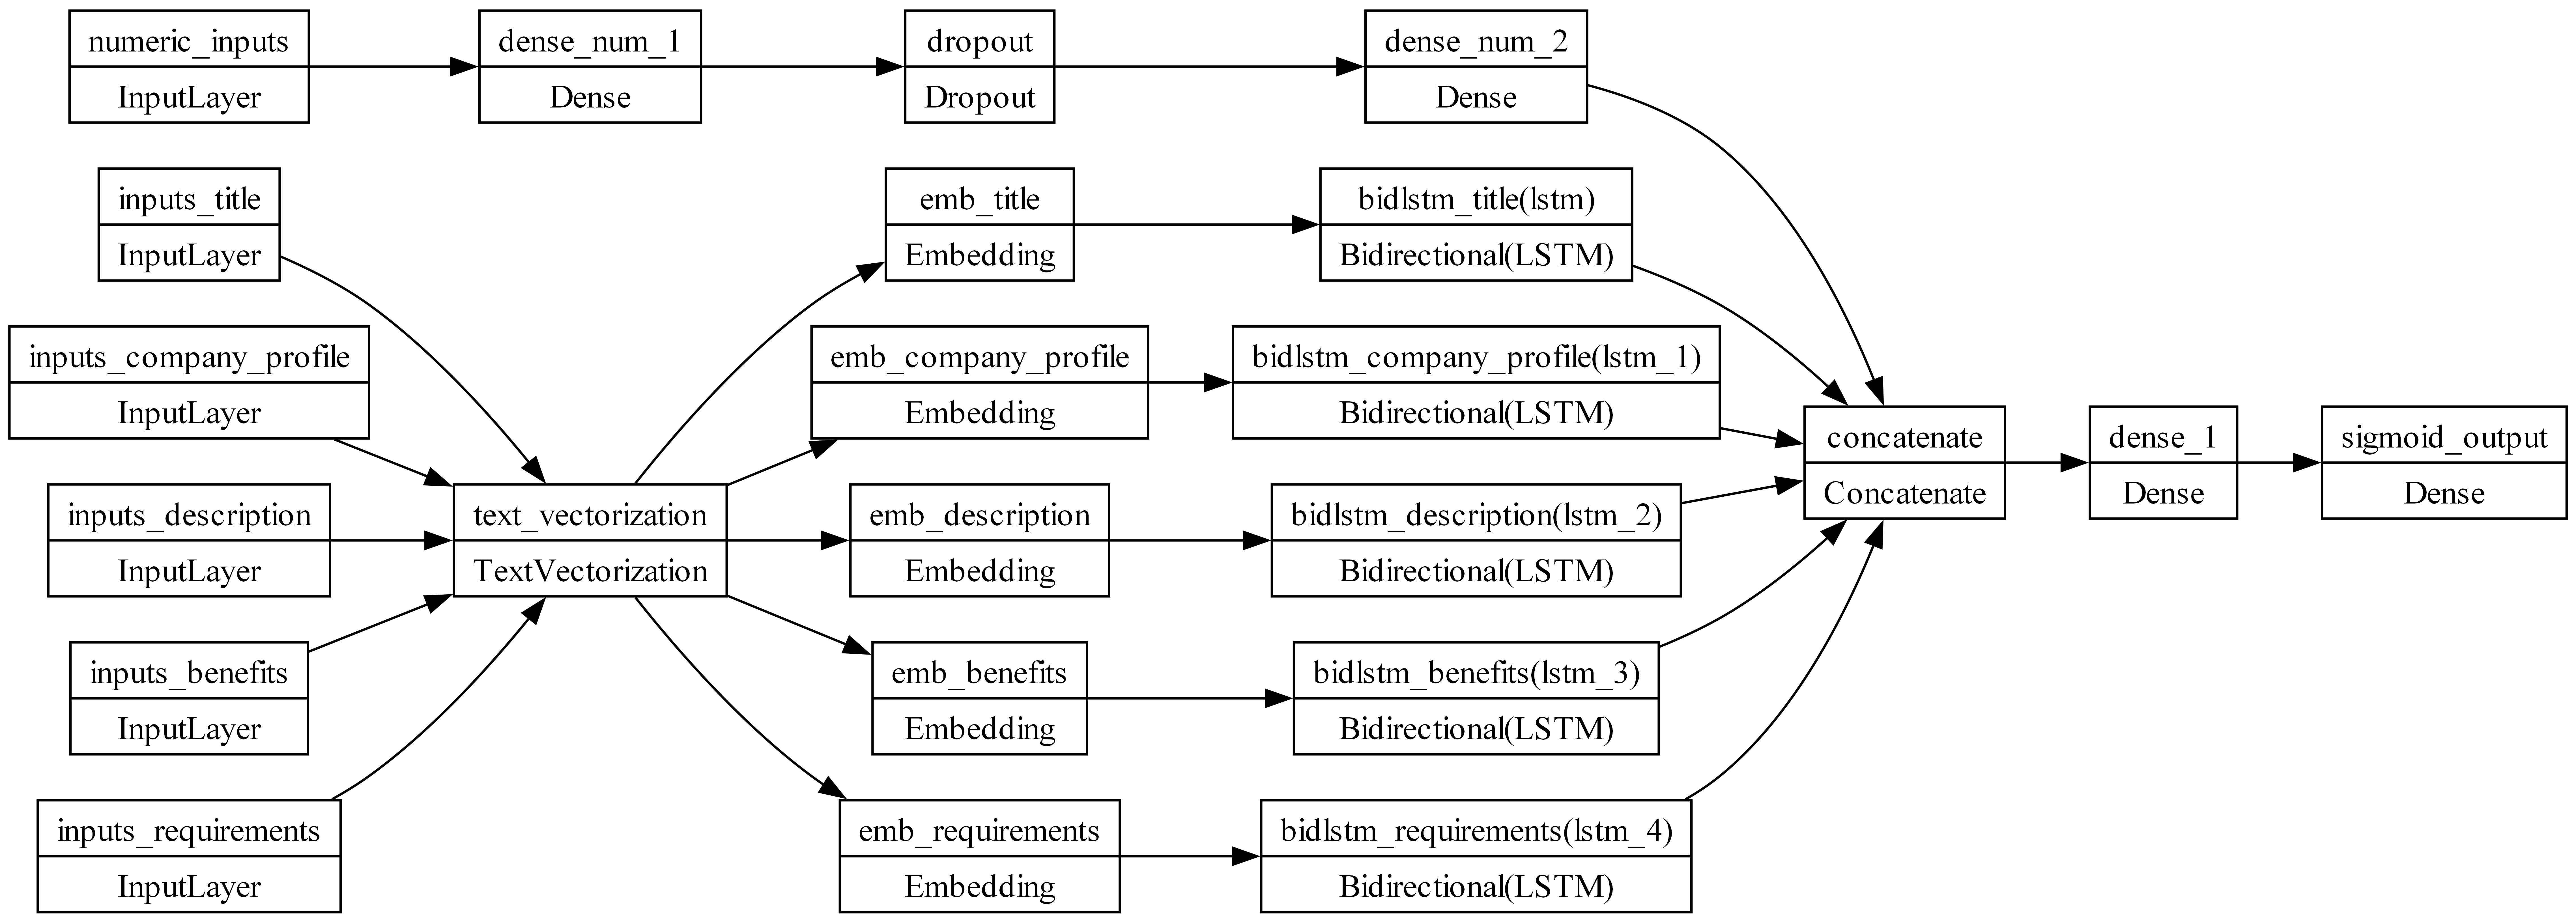

In [25]:
plot_model(
    bilstm_model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=False,
    dpi=600,
    show_layer_activations=False
)

The model architecture comprises multiple layers:

1. Numerical Input Layer: This layer receives numerical features extracted from the job postings, such as salary range, job location, and company size.
2. Text Input Layer: This layer receives textual features, including job titles, company profiles, job description, benefits, and requirements.
3. Text Vectorization Layer: This layer converts the textual input into fixed-size numerical vectors. It tokenizes the text and maps the tokens to integers based on a pre-defined vocabulary.
4. Embedding Layer: This layer converts the integer-encoded tokens into dense vectors of fixed size. These dense vectors are continuous representations of words that capture their semantic meaning.
5. Bidirectional LSTM Layers: The bidirectional LSTM layers process the sequence of embedded word vectors in both forward and backward directions. This allows the model to capture context from both the past and the future, resulting in a richer understanding of the input text.
6. Merging Layer: This layer combines the output of the bidirectional LSTM layers with the numerical input features. The combined features are then used for further processing.
7. Dense Layer: A fully connected dense layer maps the combined features to a higher-level representation. This layer uses a ReLU (rectified linear unit) activation function to introduce non-linearity and improve the model's expressive power.
8. Sigmoid Activation Layer: The final layer in the model is a dense layer with a single neuron and a sigmoid activation function. This layer outputs a value between 0 and 1, representing the probability that a given job posting is fake. Based on this probability, a threshold can be set to classify postings as legitimate or fraudulent

### 3.3 Model Training

The model is trained using a labeled dataset containing both genuine and fake job postings. To assess the model's performance, the dataset is divided into training, validation, and testing sets. Specifically, the training data is randomly split, allocating 20% for both validation and test datasets. The base models are trained with default hyperparameters, and the Bidirectional LSTM (BiLSTM) model undergoes training for up to 25 epochs. Early stopping is implemented, halting training at six epochs based on criteria involving loss and accuracy. This ensures an effective balance between model training and preventing overfitting, with loss and accuracy serving as indicators for early stoppage.

### 3.4 Model Evaluation

To evaluate and compare the performance of our models, these metrics were used
* Accuracy: It measures how often the model correctly classified fake and real job postings. The higher the accuracy, the better the model's performance.
* ROC curve: It measures how well the model can distinguish between the positive and negative classes.
* Precision: It measures how many predicted job postings were fake. A high precision indicates that the model is good at identifying fake job postings but may miss some real ones.
* Recall: It measures how many fake job postings were correctly identified by the model. A high recall indicates that the model is good at identifying most fake job postings but may also have a high false positive rate.
* F1 score: It is a way to balance precision and recall, and a high F1 score indicates that the model is good at both identifying fake job postings and avoiding false positives.

Following this modeling approach, the study successfully develops a Bidirectional LSTM-based model designed to accurately identify fraudulent job advertisements on online platforms. In the subsequent sections, the results of experiments are presented, highlighting the efficacy of the proposed approach in comparison to other state-of-the-art methods.

## Results and discussions

In this section, the study presents the results of experiments, showcasing the effectiveness of the proposed Bidirectional LSTM model in detecting fake job postings. The model's performance is comprehensively evaluated using various metrics such as accuracy, precision, recall, and F1-score. Furthermore, a comparative analysis is conducted to assess the model's performance against other state-of-the-art methods in the field.

### 4.1 Bidirectional LSTM model performance

The bidirectional LSTM model achieved the following performance metrics on the test dataset.

In [50]:
def getMetrics(y_test,y_pred): 
    auroc = np.round(roc_auc_score(y_test, y_pred),4)
    accuracy = np.round(accuracy_score(y_test, y_pred),4)
    precision = np.round(precision_score(y_test, y_pred),4)
    recall = np.round(recall_score(y_test, y_pred),4)
    f1 = np.round(f1_score(y_test, y_pred),4)
    return auroc,accuracy,precision,recall,f1

In [51]:
df_metric_list = pd.DataFrame([getMetrics(y_test,y_pred)])
df_metric_list.columns = ['auroc','accuracy','precision','recall','f1_score']
df_metric_list

,auroc,accuracy,precision,recall,f1_score
0,0.9219,0.9871,0.8802,0.8497,0.8647


The study employed a confusion matrix to assess the efficiency of the model in predicting labels. This matrix is a table that provides insights into the performance of a classification model by comparing predicted class labels to actual class labels. Among the 3,576 records in the test set, the BiLSTM model accurately identified labels for 3,530 records. Specifically, it achieved 144 true positives and correctly labeled 3,386 true negatives. The detailed confusion matrix for the BiLSTM model is illustrated below, offering a visual representation of its classification performance.

In [52]:
confusion_matrix(y_test,y_pred)

array([[3383,   20],
       [  26,  147]], dtype=int64)

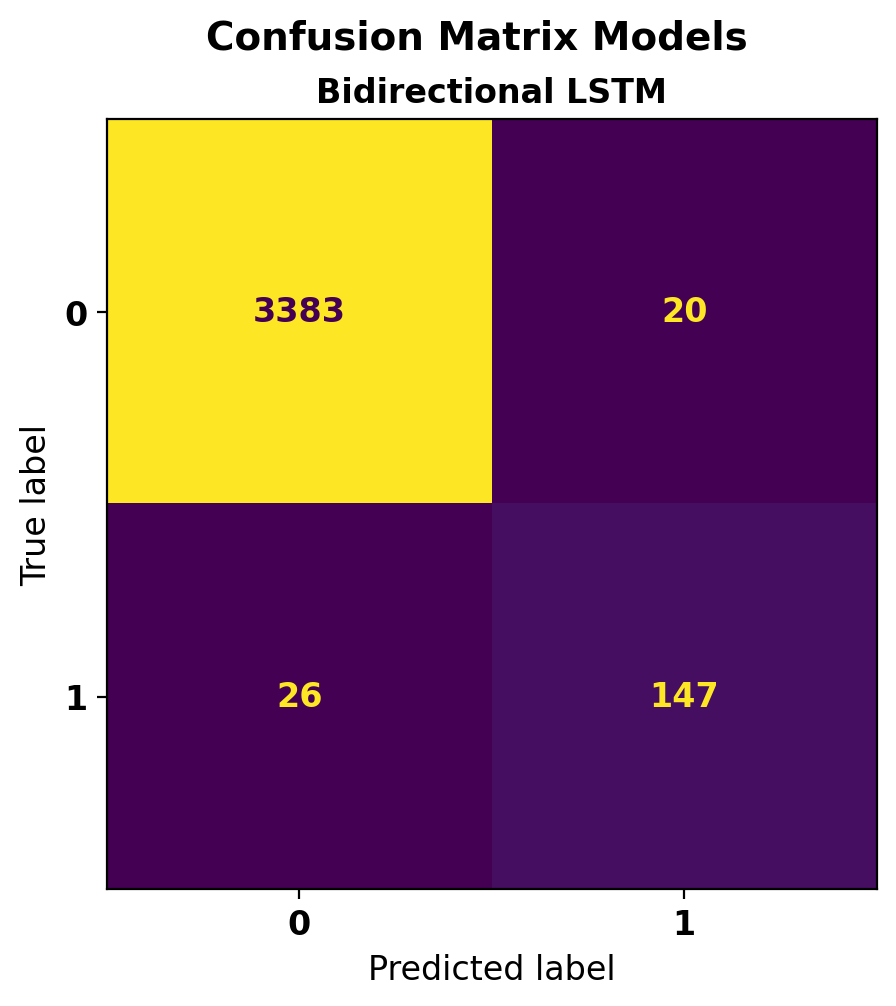

In [53]:
font = {'family':'normal','weight':'bold','size':12}
plt.rc('font', **font)

f, axes = plt.subplots(1, 1, figsize=(5,5))
i=0
#axes = axes.ravel()
f.suptitle("Confusion Matrix Models", fontsize=14, fontweight='bold')
if 1==1:
    mName = 'Bidirectional LSTM'
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred))
    disp.plot(ax=axes, values_format='.20g')
    axes.grid(False)
    disp.ax_.set_title(mName,fontweight='bold',fontsize=12)
    disp.im_.colorbar.remove()
    i=i+1
    
plt.show()

### 4.2 Ensemble models performance

Ensemble models achieved the following performance metrics on the test dataset:

In [54]:
df_metric_list = pd.DataFrame(metric_list)
df_metric_list.columns = ['modelName','auroc','accuracy','precision','recall','f1_score']
df_metric_list = df_metric_list.sort_values(["accuracy","auroc"],ascending=False).reset_index(drop=True)
df_metric_list

,modelName,auroc,accuracy,precision,recall,f1_score
0,LGBMClassifier,0.8313,0.9818,0.9426,0.6647,0.7797
1,RandomForestClassifier,0.6991,0.9704,0.9718,0.3988,0.5656
2,GradientBoostingClassifier,0.6835,0.9667,0.8649,0.3699,0.5182


Light GBM performed best among ensemble models achieving an accuracy of 98.18%. Out of the 3576 records in the test set, the Light GBM model correctly identified labels for 3511 records. In addition, 115 true positives and 3396 true negatives were labeled correctly. The confusion matrix for ensemble models is shown.

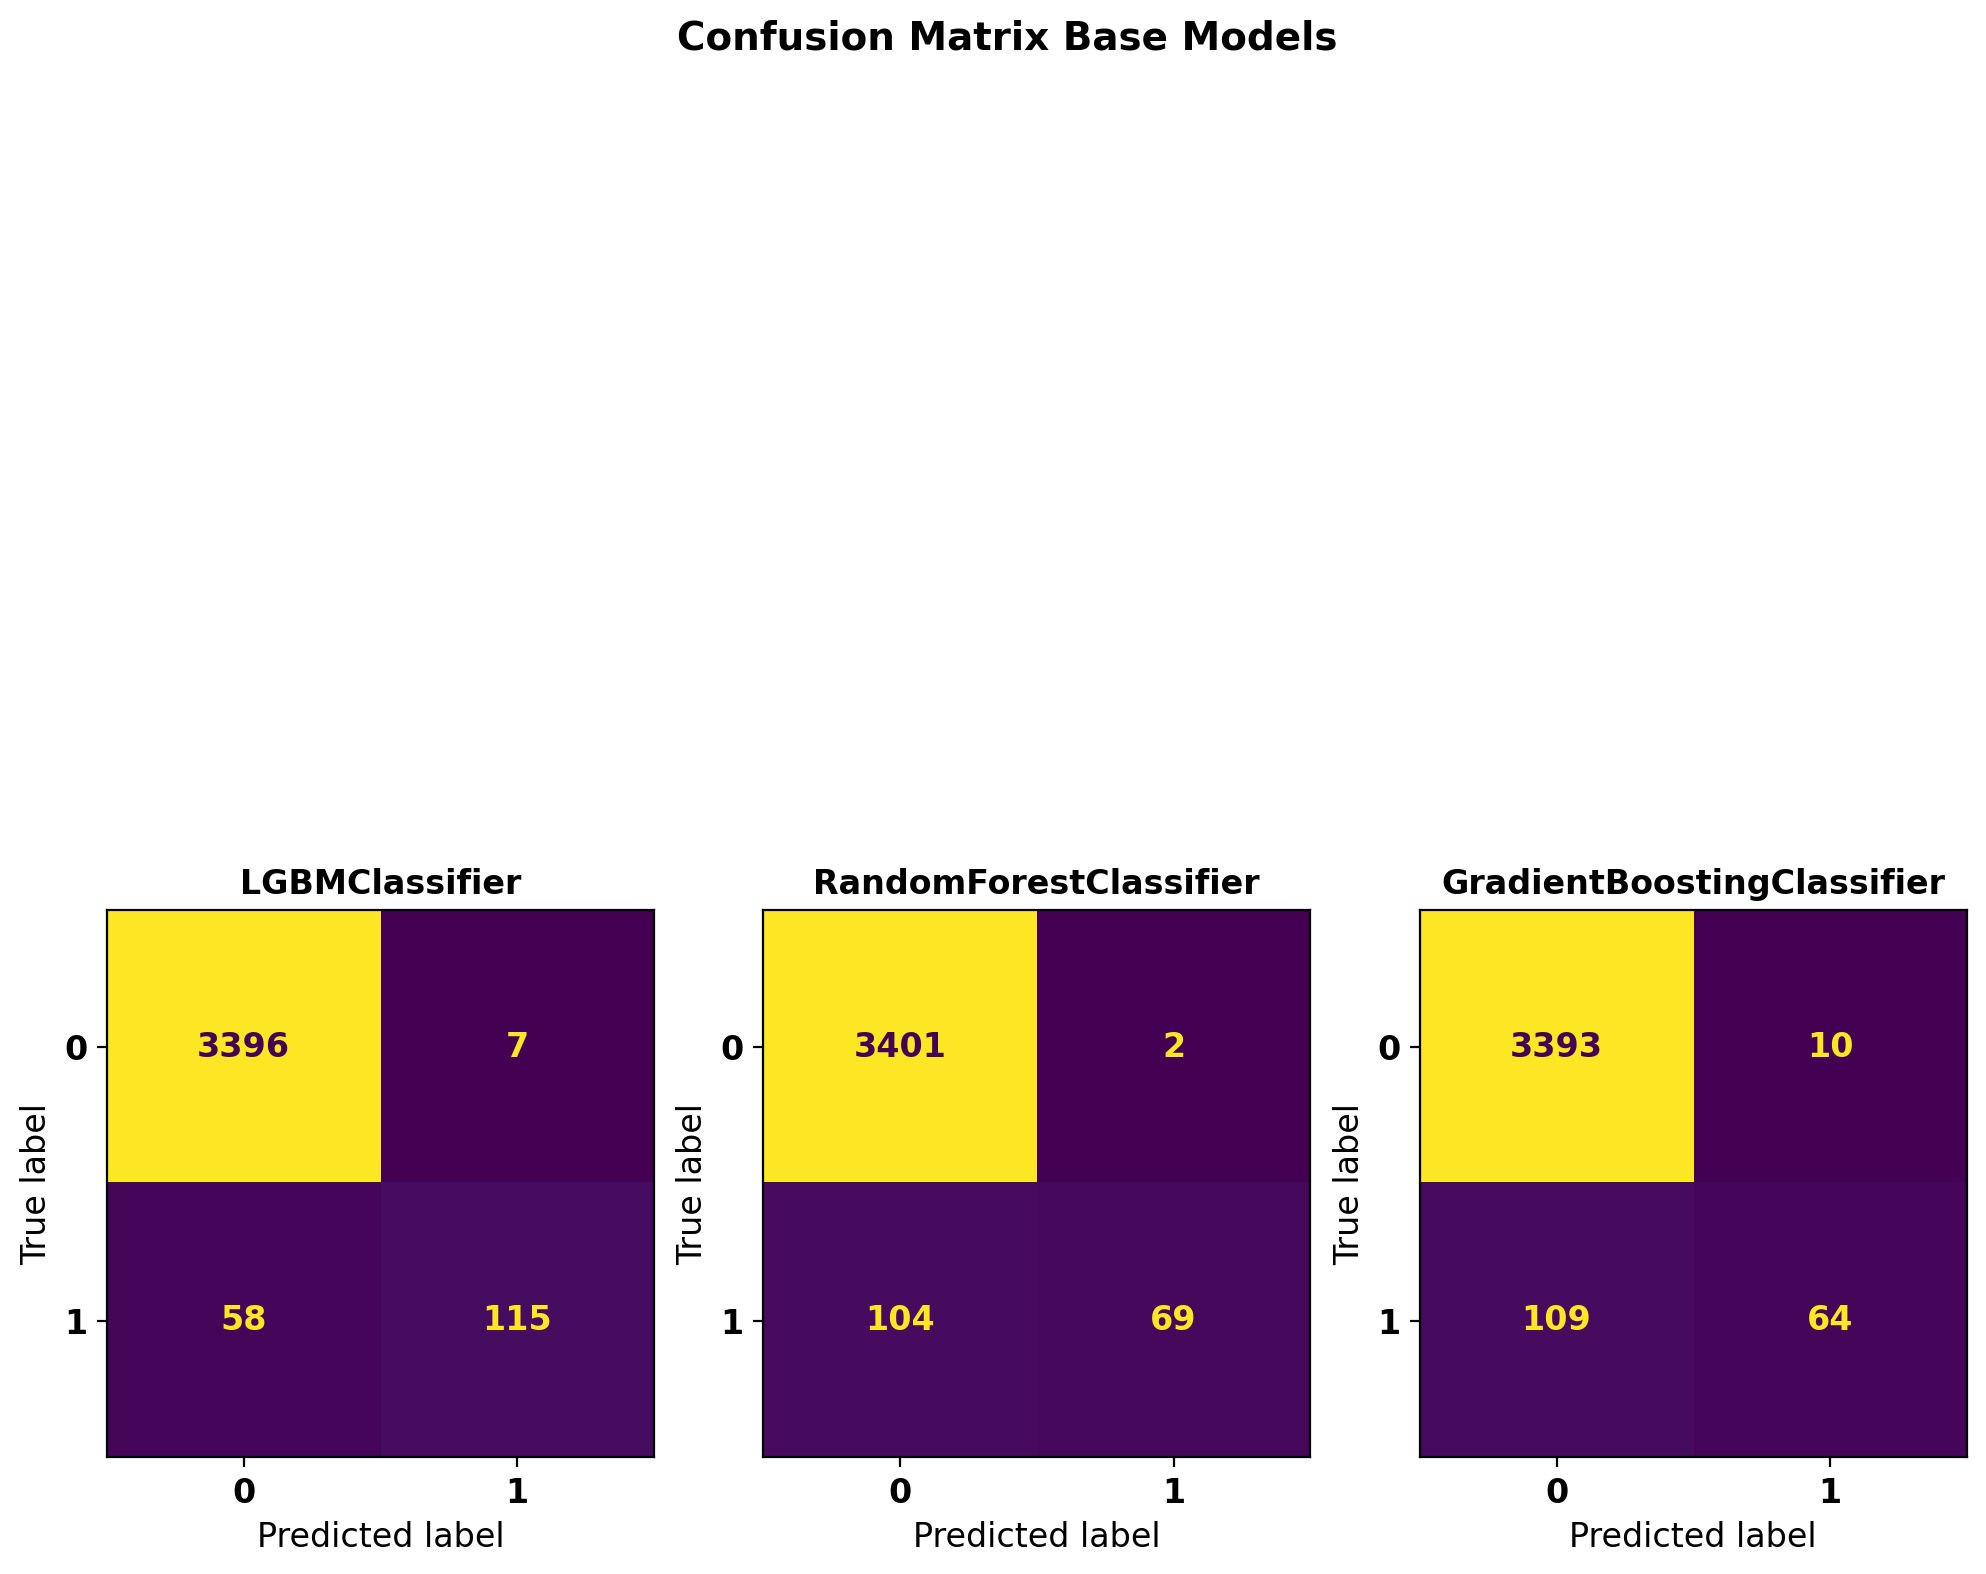

In [55]:
f, axes = plt.subplots(1, 3, figsize=(12,12))
i=0
axes = axes.ravel()
f.suptitle("Confusion Matrix Base Models", fontsize=14, fontweight='bold')
for m in models:
    mName = type(m).__name__
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test,globals()[f"y_pred_{mName}"]))
    disp.plot(ax=axes[i], values_format='.20g')
    axes[i].grid(False)
    disp.ax_.set_title(mName,fontweight='bold',fontsize=12)
    disp.im_.colorbar.remove()
    i=i+1
    
plt.show() 

### 4.3 Discussion

The experiments conducted in this study highlight the effectiveness of the proposed model in accurately identifying fraudulent job advertisements, showcasing superior performance compared to other state-of-the-art methods. Despite these promising results, the study acknowledges several challenges and identifies areas for future research that merit further discussion.
* Class Imbalance:
One of the main challenges in detecting fake job postings is the inherent class imbalance in the dataset, with a significantly lower number of fake job postings than genuine ones. This imbalance may lead to biased models that favor the majority class. While Bi-LSTM model has demonstrated promising results, future work should explore techniques to address class imbalance more effectively, such as oversampling, undersampling,or employing cost-sensitive learning approaches.
* Transfer Learning and Domain Adaptation:
The proposed model is trained and tested on a specific dataset of job postings. However, the model's performance on job postings from other sources or in different languages is uncertain. Exploring transfer learning and domain adaptation techniques could help improve the model's generalization capabilities, allowing it to perform well across various platforms and languages.
* nterpretability and Explainability:
Deep learning models, including Bi-LSTM networks, are often criticized for their lack of interpretability and explainability. However, understanding the rationale behind a model's decision is crucial, especially when dealing with sensitive information such as job postings. Therefore, future work should incorporate interpretability and explainability into the model, ensuring that users can understand and trust the model's decisions.
* Ethical Considerations:
The deployment of automated fake job posting detection systems raises ethical concerns, such as potential biases in the training data or the risk of false positives and negatives. Ensuring that these models are transparent, fair, and robust is crucial to minimize the risk of unintended consequences. Future research should address these ethical concerns and develop guidelines for the responsible use of machine learning techniques in detecting fake job postings.

## 5. Conclusion

The article introduces an innovative method for detecting fake job postings using Bidirectional LSTM networks. Through a series of experiments, the proposed model demonstrates its efficacy in identifying fraudulent job advertisements on online platforms, surpassing other state-of-the-art methods in terms of precision and recall. The key strengths of the approach lie in the Bi-LSTM model's ability to capture intricate patterns and contextual information within textual data from job postings. Leveraging these capabilities, the model provides a more accurate and reliable solution to the escalating issue of fake job postings, enhancing the safety and trustworthiness of the job-seeking experience. The work contributes to ongoing efforts in combating online job fraud and underscores the potential of Bidirectional LSTM networks in addressing deceptive content detection challenges. The authors express a hope that their findings will inspire further research and development in this area, ultimately leading to more effective solutions for maintaining the integrity of online job portals.

## 6. Conflict of interests
The author declares no conflicts of interest regarding the publication of this paper.

## 7. References

* M. Sahami, S. Dumais, D. Heckerman, and E. Horvitz, "A Bayesian approach to filtering junk email,"Learning for Text Categorization: Papers from the AAAI Workshop, vol. WS-98-05, no. Cohen, 1998.
* H. Drucker, D. Wu, and V. N. Vapnik, “Support vector machines for spam categorization,” IEEE TransNeural Netw, vol. 10, no. 5, 1999, doi: 10.1109/72.788645.
* M. Abbasi, T. Zubair, X. Zhou, and R. Zafarani, “Fake News: A Survey of Research, Detection Methods, and Opportunities,” ACM Comput. Surv, vol. 1, 2018.
* M. Ott, Y. Choi, C. Cardie, and J. T. Hancock, “Finding deceptive opinion spam by any stretch of the imagination,” in ACL-HLT 2011 - Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies, 2011.
* L. Li, K. Y. Lee, M. Lee, and S. B. Yang, “Unveiling the cloak of deviance: Linguistic cues for psychological processes in fake online reviews,” Int J Hosp Manag, vol. 87, 2020, doi: 10.1016/j.ijhm.2020.102468.
* C. Qin et al., “Enhancing person-job fit for talent recruitment: An ability-aware neural network approach,” in 41st International ACM SIGIR Conference on Research and Development in Information Retrieval, SIGIR 2018, 2018. doi: 10.1145/3209978.3210025.
* P. Banerjee and R. Gupta, “Talent Attraction through Online Recruitment Websites: Application of Web 2.0 Technologies,” Australasian Journal of Information Systems, vol. 23, 2019, doi: 10.3127/ajis.v23i0.1762.
* K. N. Jensen, M. Zhang, and B. Plank, “De-identification of Privacy-related Entities in Job Postings,” 2021.
* A. S. Pillai, “Cardiac disease prediction with tabular neural network.” 2022. doi: 10.5281/zenodo.7750620.
* A. S. Pillai, “Multi-Label Chest X-Ray Classification via Deep Learning,” Journal of Intelligent Learning Systems and Applications, vol. 14, no. 04, pp. 43–56, 2022, doi: 10.4236/jilsa.2022.144004.
* N. Ouedraogo, “Social Media Literacy in Crisis Context: Fake News Consumption during COVID-19 Lockdown,” SSRN Electronic Journal, 2020, doi: 10.2139/ssrn.3601466.